In [36]:
from keras import models
model = models.load_model('dogs_vs_cats.h5')
model.summary()

print("number of layers: ", len(model.layers))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

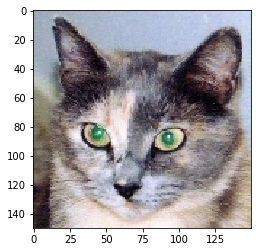

In [26]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

img_path = "./dataset/dogs_cats/train/cat.1700.jpg"
img = image.load_img(img_path, target_size=(150,150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

plt.imshow(img_tensor[0])
plt.show()

[array([[[[0.11132242, 0.        , 0.        , ..., 0.13425271,
          0.3582522 , 0.29145586],
         [0.10910752, 0.        , 0.        , ..., 0.1415697 ,
          0.3651924 , 0.28082663],
         [0.10709834, 0.        , 0.        , ..., 0.14743462,
          0.34783387, 0.27851617],
         ...,
         [0.12954397, 0.        , 0.        , ..., 0.1880765 ,
          0.45822433, 0.34727946],
         [0.12572734, 0.        , 0.        , ..., 0.18965206,
          0.46658155, 0.34369275],
         [0.12591244, 0.        , 0.        , ..., 0.1891416 ,
          0.46369982, 0.34685415]],

        [[0.10991158, 0.        , 0.        , ..., 0.1329939 ,
          0.35806805, 0.27941465],
         [0.11025969, 0.        , 0.        , ..., 0.14342423,
          0.36602807, 0.26872703],
         [0.10101647, 0.        , 0.        , ..., 0.14288482,
          0.35199955, 0.2788708 ],
         ...,
         [0.12782145, 0.        , 0.        , ..., 0.19068351,
          0.4563811 , 0.

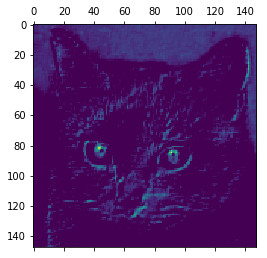

In [39]:
#create a Keras model that takes batches of images as input, 
#and outputs the activations of all convolution and pooling layers
from keras import models

layer_outputs = [ layer.output for layer in model.layers[:8]]

activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

activations = activation_model.predict(img_tensor)
first_layer_activation = activations[0]
# the output shape should be (1,148,148,32)
plt.matshow(first_layer_activation[0,:,:,4], cmap='viridis')

/Users/nguyen/Desktop/python_workspace/jupyter-notebook/.venv/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


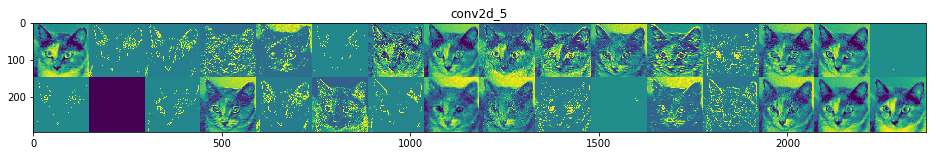

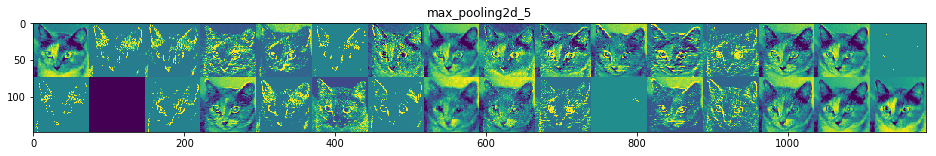

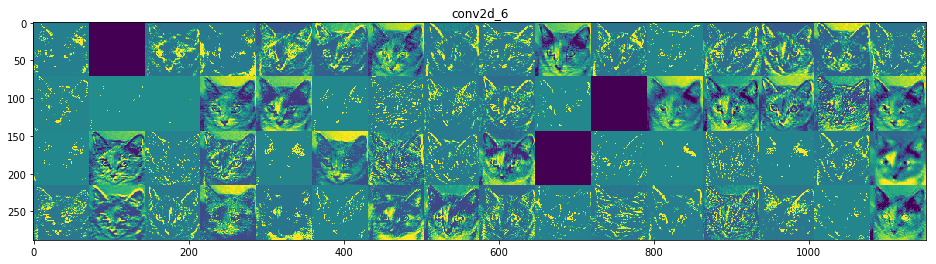

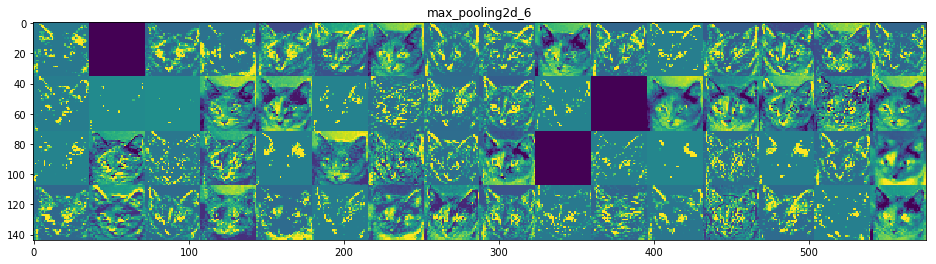

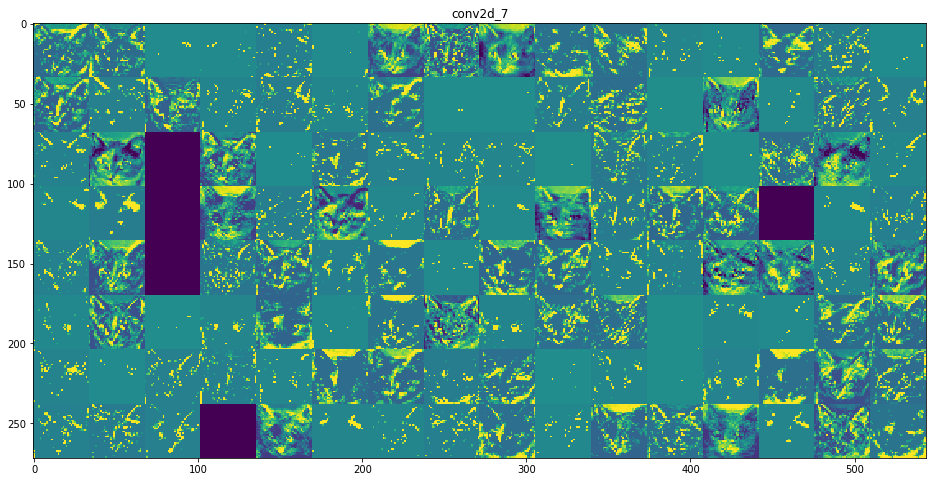

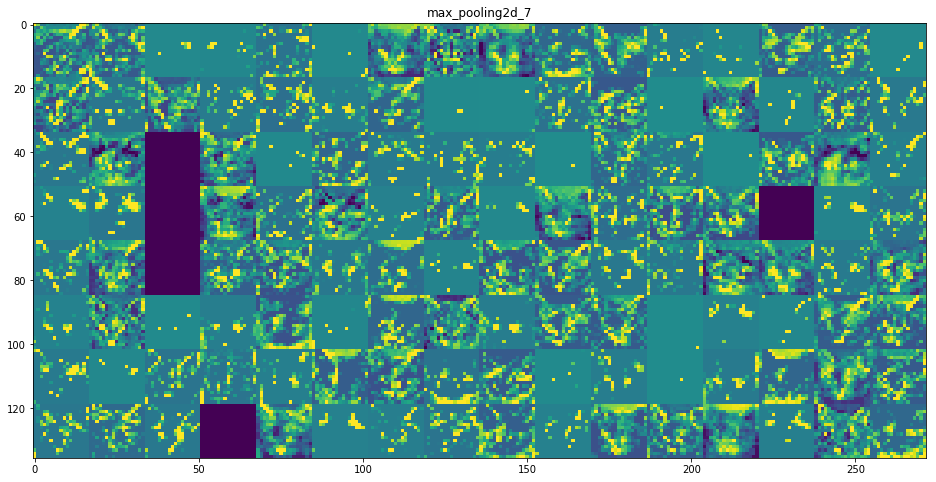

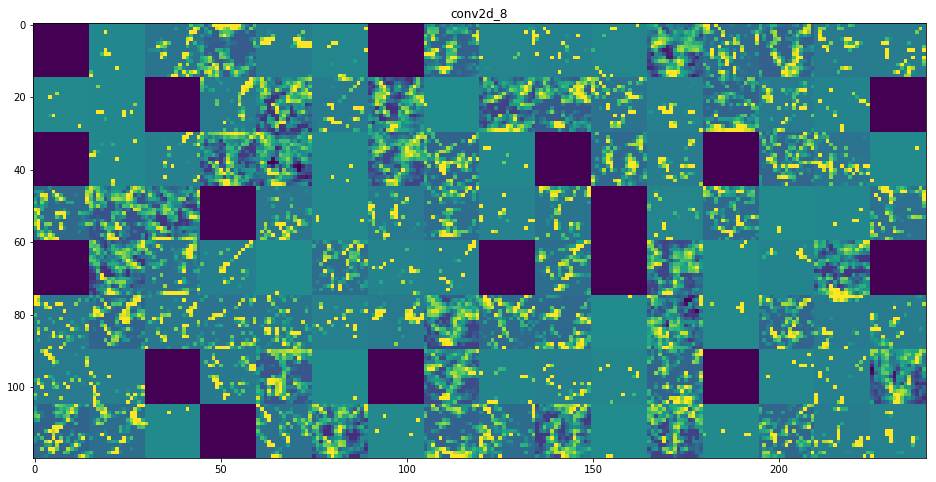

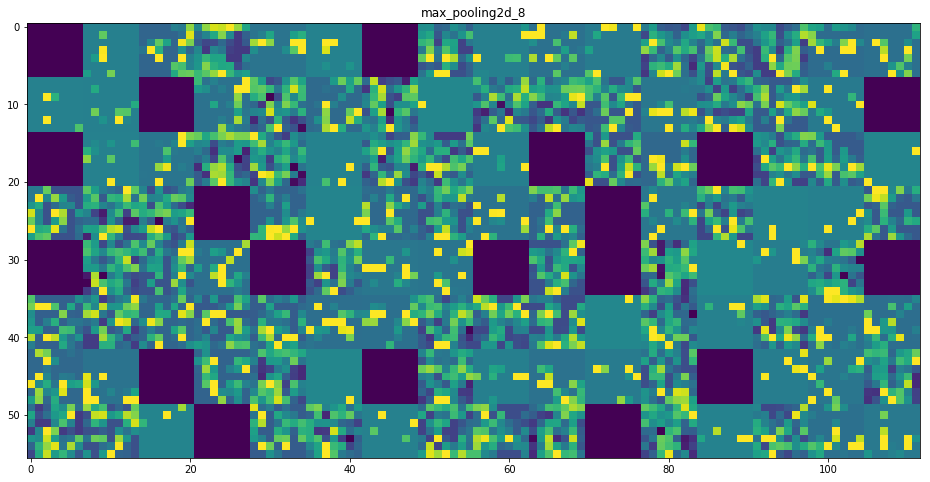

In [38]:
#visualize all filters

layer_names= []
for layer in model.layers[:8]:
    layer_names.append(layer.name)
    
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):        
    n_features = layer_activation.shape[-1]                               

    size = layer_activation.shape[1]                                      

    n_cols = n_features // images_per_row                                 
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    for col in range(n_cols):                                             
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean()                         
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,                   
                         row * size : (row + 1) * size] = channel_image

    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')